In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

df = pd.read_csv("autotrader_CA_dump.csv")
print(df)

              id                                              title  make  \
0       10218564        2010 Hyundai Tucson AWD 4dr I4 Auto Limited   NaN   
1       10235190                2015 Cadillac Escalade 4WD 4dr Base   NaN   
2       10289127                           2006 Mercedes-Benz SL500   NaN   
3       10296405                       2012 Honda CR-V AWD 5dr EX-L   NaN   
4       10316488                                 2017 Tesla Model S   NaN   
...          ...                                                ...   ...   
259235  77001568  2019 Ford F-150 XL AUTO A/C GR ELECT MAGS CAM ...   NaN   
259236  77001569                        2023 Lexus RX 350 Executive   NaN   
259237  77001570  2013 Infiniti EX37 EX37, AWD, GARANTIE 1 AN IN...   NaN   
259238  77001572              1976 Dodge D100 et W100 Sportsman van   NaN   
259239  77001573                       2023 Lexus RX 350h Executive   NaN   

        year    price                                               link  \

In [105]:
print(list(df.columns))

['id', 'title', 'make', 'year', 'price', 'link', 'odometer', 'dealer']


In [106]:

#data cleaning

#odometer
cleanedVals = []
for value in df["odometer"]:
    try:
        mileage = value.split(" ")[1].replace(",","")
        cleanedVals.append(int(mileage))
    except:
        cleanedVals.append(0)

df["odometer"] = cleanedVals


#price
#iterate through price in df
#replace '$' and ',' with "", cast to int
cleanedVals = []
for value in df["price"]:
    try:
        price = value.replace("$","").replace(",","")
        cleanedVals.append(int(price))
    except:
        cleanedVals.append(0)
df["price"] = cleanedVals

#title, make, year
#make - Hyundai, Cadillac, Honda, etc
#title - "Tucson AWD 4dr I4 Auto Limited", etc.
year = []
title = []
make = []
for value in df["title"]:
    vals = value.split(" ")
    
    #year
    try:
        year.append(int(vals[0]))
    except:
        year.append(0)
    
    #make
    try:
        make.append(vals[1])
    except:
        make.append("Not a Make")
    
    #title
    try:
        title.append(" ".join(vals[2:]))
    except:
        make.append("Not a Title")

df["year"] = year
df["title"] = title
df["make"] = make

print(df)


              id                                      title           make  \
0       10218564             Tucson AWD 4dr I4 Auto Limited        Hyundai   
1       10235190                      Escalade 4WD 4dr Base       Cadillac   
2       10289127                                      SL500  Mercedes-Benz   
3       10296405                          CR-V AWD 5dr EX-L          Honda   
4       10316488                                    Model S          Tesla   
...          ...                                        ...            ...   
259235  77001568  F-150 XL AUTO A/C GR ELECT MAGS CAM RECUL           Ford   
259236  77001569                           RX 350 Executive          Lexus   
259237  77001570       EX37 EX37, AWD, GARANTIE 1 AN INCLUS       Infiniti   
259238  77001572                 D100 et W100 Sportsman van          Dodge   
259239  77001573                          RX 350h Executive          Lexus   

        year  price                                            

In [107]:
unique_makes = df["make"].unique()
print(unique_makes)

['Hyundai' 'Cadillac' 'Mercedes-Benz' 'Honda' 'Tesla' 'BMW' 'Ford'
 'Porsche' 'Audi' 'Oldsmobile' 'Suzuki' 'Pontiac' 'Kia' 'Saab' 'Toyota'
 'Chevrolet' 'Volkswagen' 'Dodge' 'Infiniti' 'MINI' 'Lexus' 'Ram'
 'Lincoln' 'Volvo' 'Acura' 'GMC' 'Rolls-Royce' 'Subaru' 'Mitsubishi'
 'Chrysler' 'Jaguar' 'Mazda' 'Nissan' 'Jeep' 'Ferrari' 'Triumph' 'Land'
 'Fiat' 'Mercedes-AMG' 'McLaren' 'Maserati' 'Plymouth' 'Datsun' 'Buick'
 'Durant' 'International' 'Aston' 'MG' 'Alfa' 'Shelby' 'Austin' 'Scion'
 'Bentley' 'Isuzu' 'Mercury' 'MV-1' 'Genesis' 'Lotus' 'Lamborghini'
 'Hudson' 'Saturn' 'Kaiser' 'Polestar' 'smart' 'Hummer' 'Citroen' 'Edsel'
 'De' 'Nash' 'Morris' 'Austin-Healey' 'Hino' 'Bricklin' 'Checker' 'Lancia'
 'American' 'AM' 'Factory' 'Acadian' 'AC' 'Jensen' 'Sterling'
 'Freightliner' 'Innocenti' 'Studebaker' 'Packard' 'Rover' 'Amphicar'
 'Superformance' 'TVR' 'Rivian' 'Maybach' 'Renault' 'Morgan' 'Bugatti'
 'Daimler' 'Sunbeam' 'Fisker' 'Geo' 'Aurora' 'Puma' 'Qvale' 'Autozam'
 'Daihatsu' 'POLESTA

              id                                              title    make  \
705     12239330                              Crosstrek Touring CVT  Subaru   
44467   74529799                          Crosstrek Convenience CVT  Subaru   
48853   74855742  Crosstrek OUTDOOR | AWD |LEATHER |TOUCHSCREEN ...  Subaru   
60771   75351110                          Crosstrek Convenience CVT  Subaru   
62326   75406001  Crosstrek Touring BACKUP CAM | HEATED SEATS | ...  Subaru   
...          ...                                                ...     ...   
252192  76949299  Crosstrek Outdoor AWD - EyeSight Package, Leat...  Subaru   
252196  76949309  Crosstrek Touring AWD - Heated Seats, Reverse ...  Subaru   
254694  76957246                                     Crosstrek 2.0i  Subaru   
256177  76976440                                     Crosstrek 2.0i  Subaru   
259080  77001149                                     Crosstrek 2.0i  Subaru   

        year  price                                

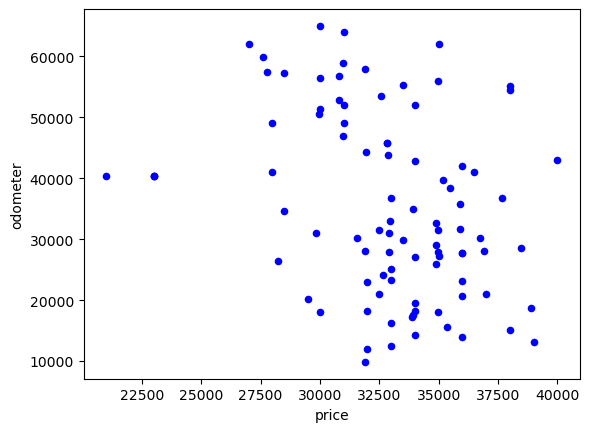

In [112]:

#Removing outliers

#price
p1 = df["price"].quantile(0.25)
p3 = df["price"].quantile(0.75)
pIQR = p3-p1
pLower = p1 - (1.5*pIQR)
pUpper = p3 + (1.5*pIQR)

df_filtered_price = df[((df['price']>0)&(df['price']<40000))]

#odometer
o1 = df_filtered_price["odometer"].quantile(0.25)
o3 = df_filtered_price["odometer"].quantile(0.75)
oIQR = o3-o1
oLower = o1 - (1.5*oIQR)
oUpper = o3 + (1.5*oIQR)

df_filtered = df_filtered_price[((df_filtered_price['odometer']>0)&(df_filtered_price['odometer']<=65000))]

filtered = df_filtered[((df_filtered['make']=="Subaru")&(df_filtered['title'].str.contains('Crosstrek', case=False))&(df_filtered["link"].str.contains("Ontario",case=False))&(df_filtered["year"]>2018))]
print(filtered)

#sample = df_filtered.sample(frac=0.005)

scatter = filtered.plot(kind='scatter', x='price', y='odometer', color='blue')

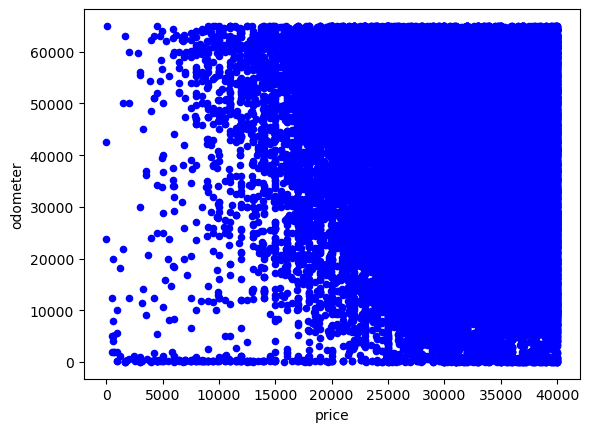

In [93]:
# price < $30,000
# mileage < 65,000 km
# year > 2018

#honda, Subaru, Toyata, Jeep Wrangler

#df_filtered = df_filtered_price[((df_filtered_price['odometer']>0)&(df_filtered_price['odometer']<=oUpper))]
#df_optimal = df_filtered[((df_filtered['price']<40000)&(df_filtered["odometer"]<=65000))]

#optimal_scatter = df_optimal.plot(kind="scatter",x="price",y="odometer",color="blue")